# Anugrah AK._202131037_B

### Import Library

In [170]:
import cv2 as cv

In [171]:
import numpy as np

### Membaca Gambar

In [172]:
citra = cv.imread('1.jpg')

In [173]:
cv.imshow("Citra Asli",citra)
cv.waitKey(0)
cv.destroyAllWindows()

### Dimensi Gambar dan Tipe Data

In [174]:
print(citra.shape)
print(citra.dtype)

(128, 128, 3)
uint8


### Membagi Gambar RGB

In [175]:
b = citra[:,:,0]
g = citra[:,:,0]
r = citra[:,:,0]

# 1. CONVERT CITRA

### Konevrsi RGB ke Grayscale

In [176]:
panjang = len(citra)
lebar = len(citra)

citra_gray = np.zeros((panjang,lebar))

for i in range (panjang):
    for j in range (lebar):
        citra_gray[i,j] = 0.2989 * r[i,j] + 0.587 * g[i,j] + 0.1141 * b[i,j]
        
citra_gray = citra_gray.astype(np.uint8)

In [177]:
cv.imshow('Gray', citra_gray)
cv.waitKey(0)
cv.destroyAllWindows()

In [178]:
print(citra_gray)

[[158  86 161 ...  82   4   0]
 [145  74  85 ...  79  52  75]
 [134  65 173 ...  48  43  33]
 ...
 [104  73 138 ...  28 115  65]
 [ 52 127 118 ...  22 159  56]
 [ 82  94  65 ...  71  73  88]]


### Mengkonversi Grayscale ke Biner

In [179]:
panjang = len(citra)
lebar = len(citra[0])

ambang = 255

citra_biner = np.zeros((panjang,lebar))
for i in range (panjang):
    for j in range (lebar):
        if citra_gray[i,j] >= ambang:
            citra_biner[i,j] = 0
        else:
                citra_biner[i,j] = 1

In [180]:
cv.imshow('Biner', citra_gray)
cv.waitKey(0)
cv.destroyAllWindows()

### Cetak Piksel pada indeks tertentu

In [181]:
print(citra_gray[50,50])

199


### Menyimpan Gambar

In [182]:
cv.imwrite("Hasil-gray-citra.png", citra_gray)

True

# 2. FILTER KONVOLUSI

In [183]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray

(128, 128)


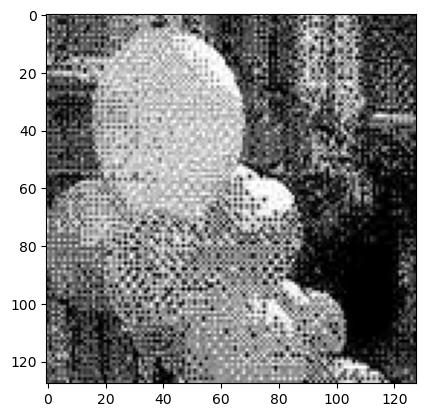

In [184]:
citra_biner = imread(fname="Hasil-gray-citra.png")
print(citra_biner.shape)
plt.imshow(citra_biner,cmap='gray')

Text(0.5, 1.0, 'Citra Output')

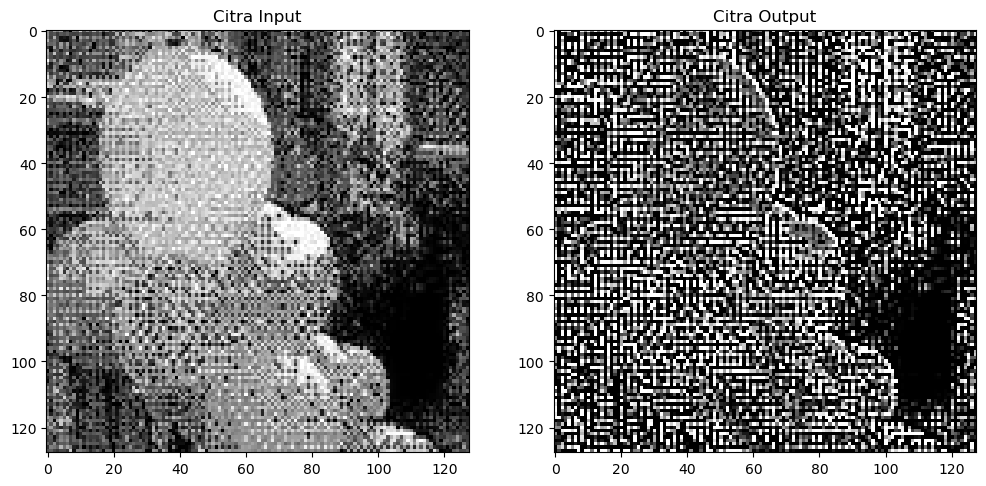

In [185]:
kernel = np.array([[-1, 0, -1],
                   [0, 4.3, 0],
                  [-1, 0, -1]])
citraOutput = cv2.filter2D(citra_biner, -1, kernel)

fig, axes = plt.subplots(1,2, figsize=(12,12))
ax = axes.ravel()

ax[0].imshow(citra_biner, cmap ='gray')
ax[0].set_title("Citra Input")
ax[1].imshow(citraOutput, cmap = 'gray')
ax[1].set_title('Citra Output')

# 3. HISTOGRAM

In [186]:
img = cv2.imread("1.jpg")

In [187]:
cv2.imshow("Balon",img)
cv2.waitKey()
cv2.destroyAllWindows()

In [189]:
[baris, kolom] = img.shape[:2]

In [190]:
hist = cv2.calcHist([img], [0], None,[256],[0,256])
hist

array([[1014.],
       [ 154.],
       [ 118.],
       [  84.],
       [ 104.],
       [  93.],
       [  68.],
       [  85.],
       [  62.],
       [  69.],
       [  61.],
       [  81.],
       [  66.],
       [  61.],
       [  75.],
       [  78.],
       [  65.],
       [  75.],
       [  88.],
       [  67.],
       [  64.],
       [  58.],
       [  56.],
       [  65.],
       [  55.],
       [  61.],
       [  46.],
       [  49.],
       [  55.],
       [  57.],
       [  40.],
       [  58.],
       [  52.],
       [  50.],
       [  40.],
       [  45.],
       [  41.],
       [  58.],
       [  46.],
       [  46.],
       [  63.],
       [  38.],
       [  48.],
       [  39.],
       [  47.],
       [  51.],
       [  51.],
       [  43.],
       [  45.],
       [  56.],
       [  55.],
       [  47.],
       [  44.],
       [  56.],
       [  58.],
       [  59.],
       [  70.],
       [  67.],
       [  65.],
       [  53.],
       [  53.],
       [  56.],
       [

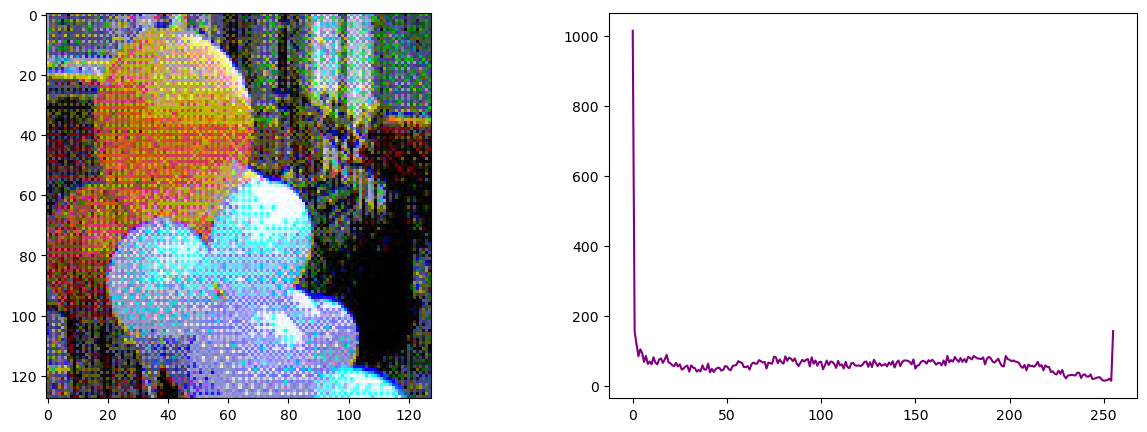

In [192]:
fig, axs = plt.subplots(1,2, figsize =(15,5))
axs[0].imshow(img)
axs[1].plot(hist, color = 'purple')
plt.show()

### Konversi BGR ke RGB

In [193]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

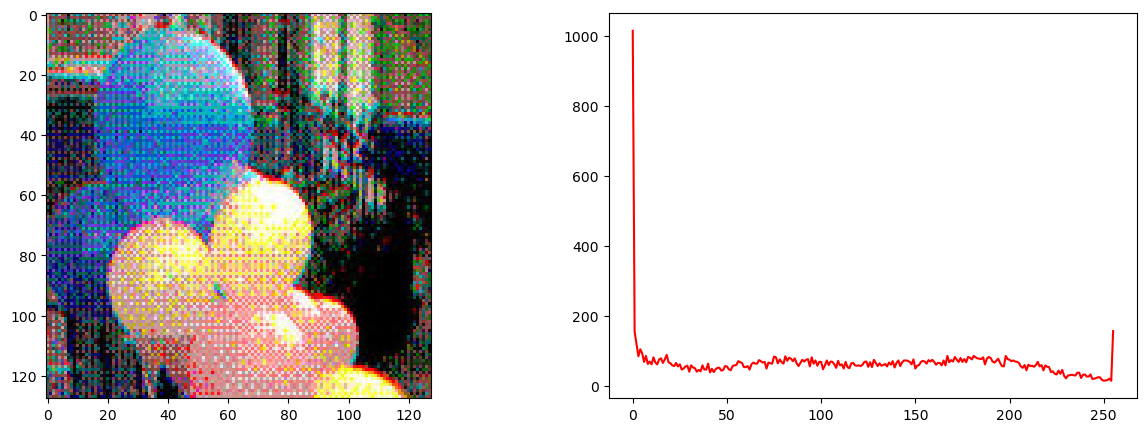

In [194]:
fig, axs = plt.subplots(1,2, figsize =(15,5))
axs[0].imshow(rgb)
axs[1].plot(hist, color = 'red')
plt.show()

### 2 Versi Histogram

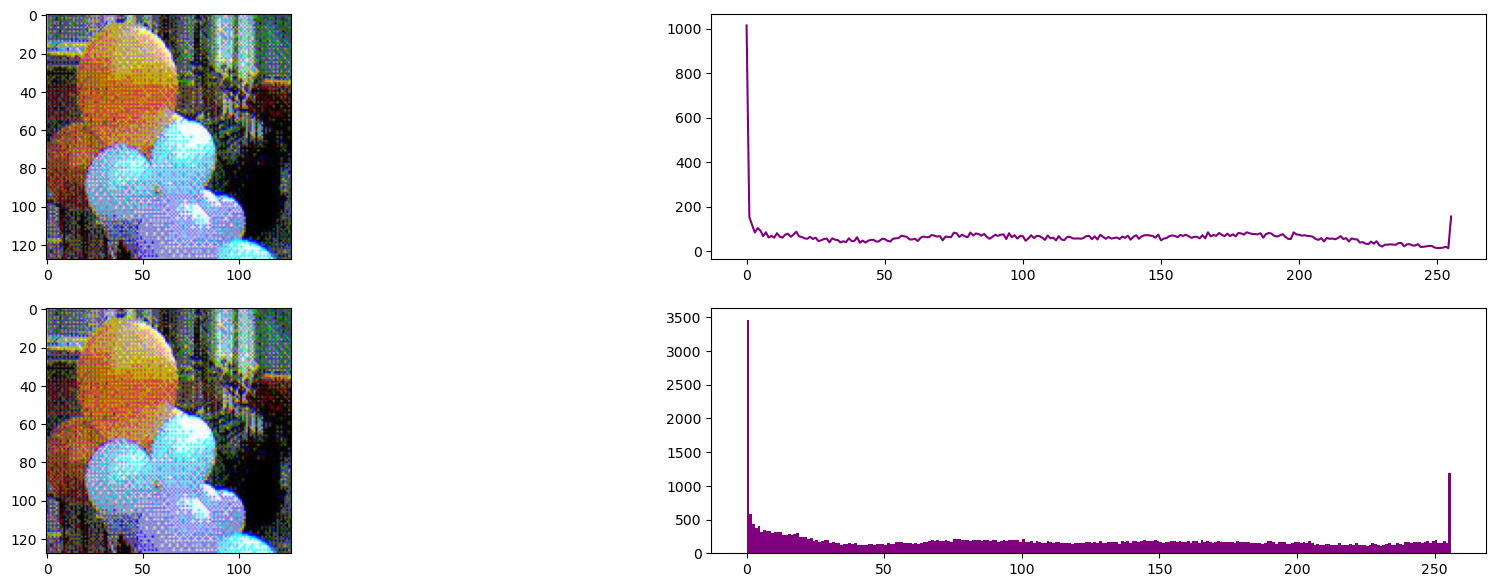

In [195]:
fig, axs = plt.subplots(2,2, figsize =(22,7))
#versi 1
axs[0,0].imshow(img)
axs[0,1].plot(hist, color = 'purple')

#versi 2
axs[1,0].imshow(img)
axs[1,1].hist(img.ravel(),256, [0,256], color = 'purple')
plt.show()

### Histogram Abu-Abu

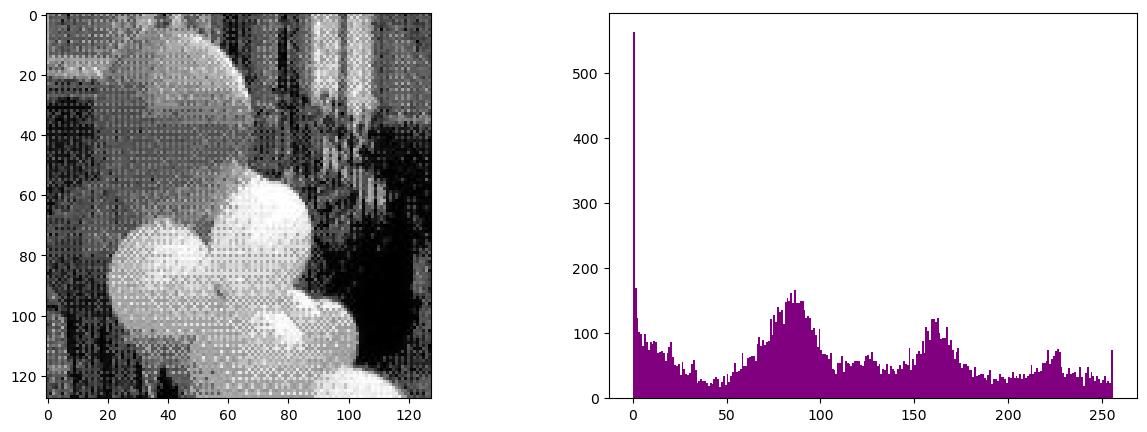

In [196]:
abu = cv2.imread("1.jpg", 0)
hist2 = cv2.equalizeHist(abu)

fig, axs = plt.subplots(1,2, figsize =(15,5))
axs[0].imshow(cv2.cvtColor(abu,cv2.COLOR_BGR2RGB))
axs[1].hist(abu.ravel(), 256, [0,256], color= "purple")
plt.show()

### Meningkatkan Kecerahan

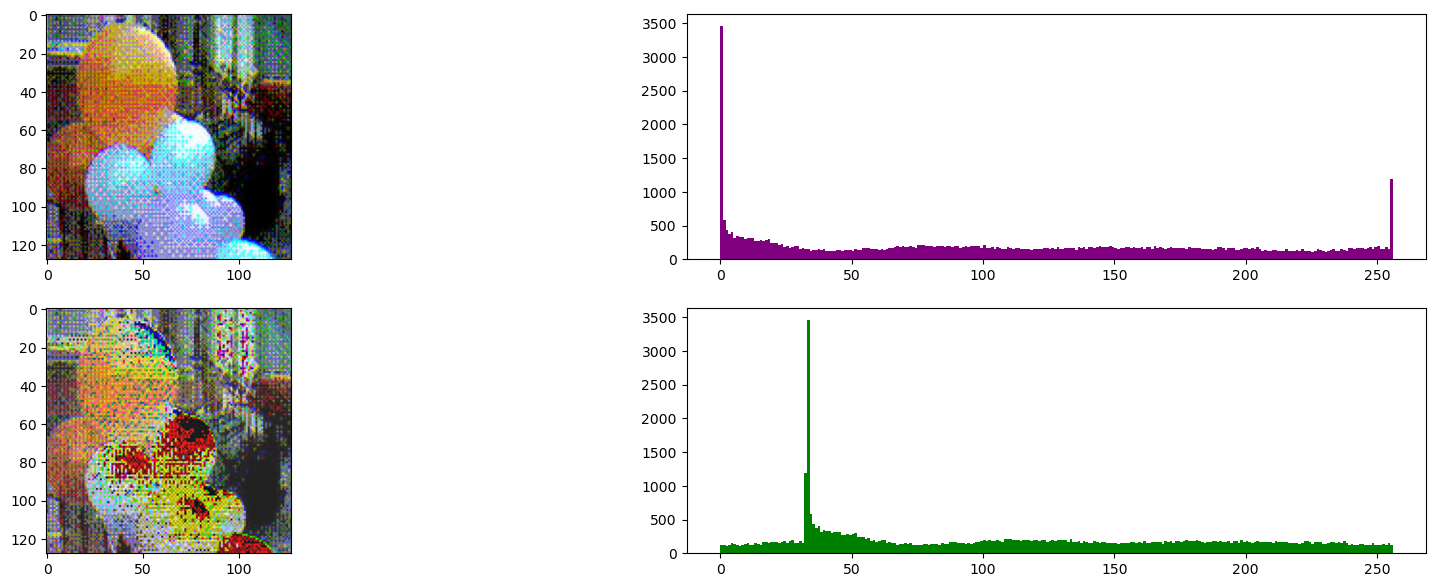

In [197]:
beta = 33
citra_cerah = np.zeros((baris, kolom, 3))

for x in range(baris):
    for y in range(kolom):
        gyx = img[x,y]+beta
        citra_cerah[x,y] = gyx
citra_cerah = citra_cerah.astype(np.uint8)

#sebelum
fig, axs = plt.subplots(2,2, figsize =(21,7))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(), 256, [0,256], color="purple")

#setelah
axs[1,0].imshow(citra_cerah)
axs[1,1].hist(citra_cerah.ravel(), 256, [0,256], color="green")
plt.show()

### Meregangkan Kontras

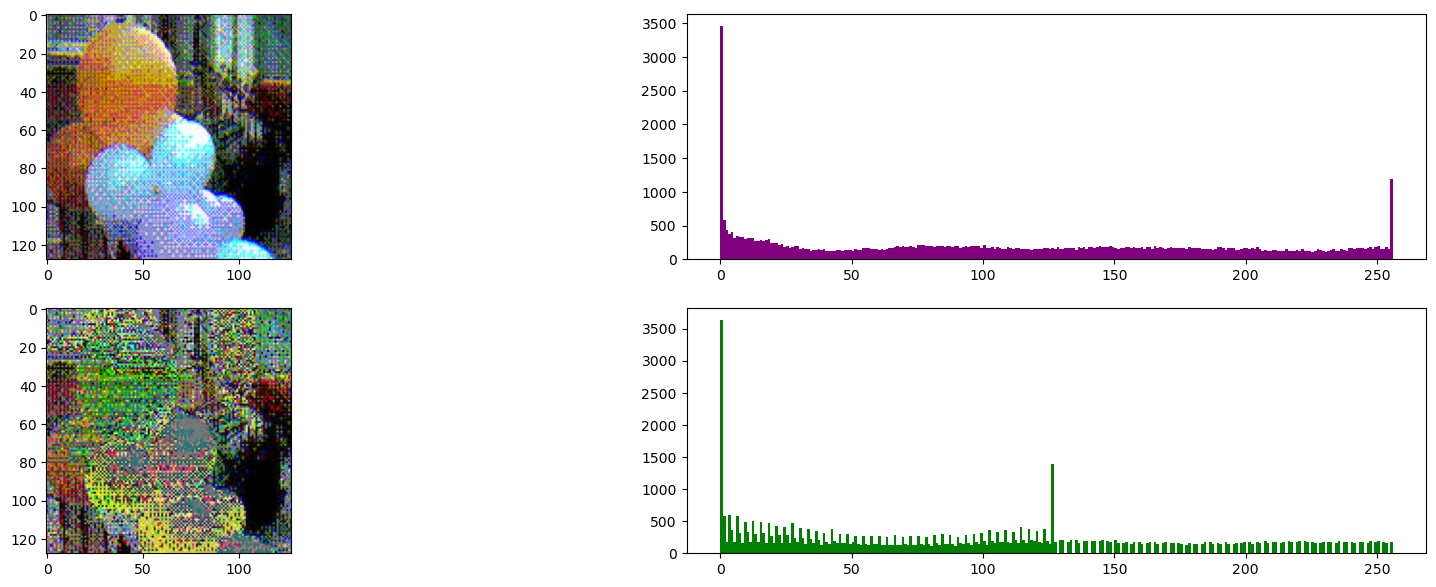

In [198]:
alpa = 1.5
citra_kontras = np.zeros((baris, kolom, 3))

for x in range(baris):
    for y in range(kolom):
        gyx = img[x,y]*alpa
        citra_kontras[x,y] = gyx
citra_kontras = citra_kontras.astype(np.uint8)

#sebelum
fig, axs = plt.subplots(2,2, figsize =(21,7))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(), 256, [0,256], color="purple")

#setelah
axs[1,0].imshow(citra_kontras)
axs[1,1].hist(citra_kontras.ravel(), 256, [0,256], color="green")
plt.show()